##Delta Hedging의 주요 개념:

###델타(Delta):

옵션 가격이 기초 자산 가격에 대해 얼마나 민감한지를 나타내는 값입니다. 델타는 기초 자산 가격이 1단위 변화할 때 옵션 가격이 얼마나 변화하는지를 나타냅니다.
콜 옵션의 델타는 0과 1 사이의 값을 가지며, 풋 옵션의 델타는 -1과 0 사이의 값을 가집니다.

###델타 중립(Delta-Neutral):

포트폴리오의 델타를 0으로 유지하는 상태를 말합니다. 델타 중립 상태에서는 기초 자산의 가격 변동에 대해 포트폴리오의 가치가 변하지 않도록 합니다.

###델타 헤징(Delta Hedging):

포트폴리오의 델타를 중립적으로 유지하기 위해 기초 자산의 포지션을 지속적으로 조정하는 전략입니다. 이는 기초 자산의 가격 변동과 옵션의 시간 경과에 따라 델타가 변화하기 때문입니다.

[*********************100%%**********************]  1 of 1 completed


                 Close   Returns  Cumulative Returns     Delta  \
Date                                                             
2023-12-22  193.600006 -0.005547            0.547933  0.948003   
2023-12-26  193.050003 -0.002841            0.543536  0.946472   
2023-12-27  193.149994  0.000518            0.544335  0.946754   
2023-12-28  193.580002  0.002226            0.547773  0.947948   
2023-12-29  192.529999 -0.005424            0.539378  0.944988   

            Hedge Position  Hedge Returns  Cumulative Hedge Returns  
Date                                                                 
2023-12-22       -0.948003       0.005275                 -0.256564  
2023-12-26       -0.946472       0.002693                 -0.254562  
2023-12-27       -0.946754      -0.000490                 -0.254927  
2023-12-28       -0.947948      -0.002108                 -0.256498  
2023-12-29       -0.944988       0.005142                 -0.252675  


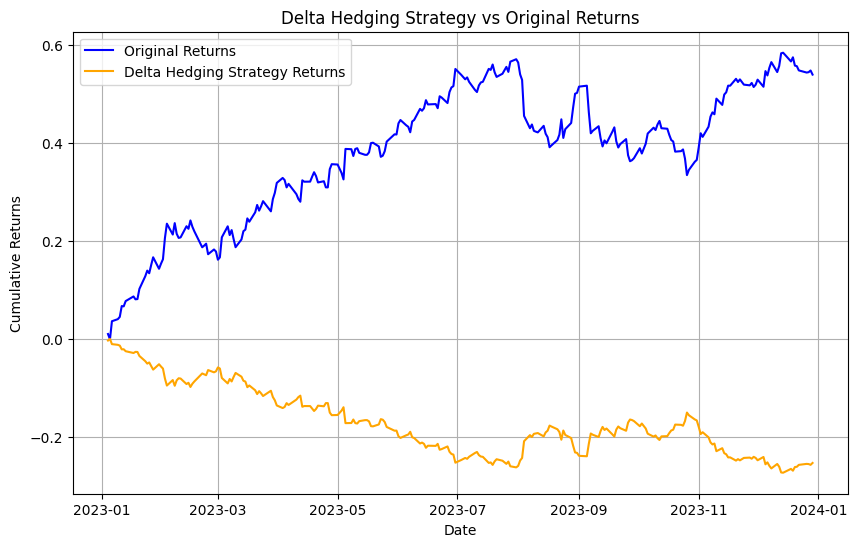

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes-Merton Delta 계산 함수
def black_scholes_merton_delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        delta = norm.cdf(d1)
    elif option_type == "put":
        delta = norm.cdf(d1) - 1
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return delta

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
data['Returns'] = data['Close'].pct_change()

# 예제 파라미터
K = 150  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
option_type = "call"

# Delta 계산 및 Delta Hedging 전략 적용
data['Delta'] = data.apply(lambda row: black_scholes_merton_delta(row['Close'], K, T, r, sigma, option_type), axis=1)
data['Hedge Position'] = -data['Delta']
data['Hedge Returns'] = data['Hedge Position'].shift(1) * data['Returns']

# 누적 수익률 계산
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative Hedge Returns'] = (1 + data['Hedge Returns']).cumprod() - 1

# 결과 출력
print(data[['Close', 'Returns', 'Cumulative Returns', 'Delta', 'Hedge Position', 'Hedge Returns', 'Cumulative Hedge Returns']].tail())

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cumulative Returns'], label='Original Returns', color='blue')
plt.plot(data.index, data['Cumulative Hedge Returns'], label='Delta Hedging Strategy Returns', color='orange')
plt.title('Delta Hedging Strategy vs Original Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
